# 1. EDA

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
df = pd.read_csv('../datasets/dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [72]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4424, 35)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [74]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

We see that there are multiple categorical features in the dataset marked as int64, we will have to clean this in the cleaning process.

There are also no duplicated values in the dataset.

## Analysis
We now do analysis on the question: "To what extent does family background affect a student’s academic performance?"

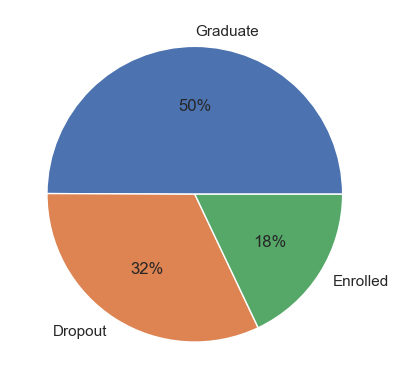

In [75]:
counts = df['Target'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%.0f%%')
plt.show()

We see that there is an imbalance of classes, this might be a challenge to train with.

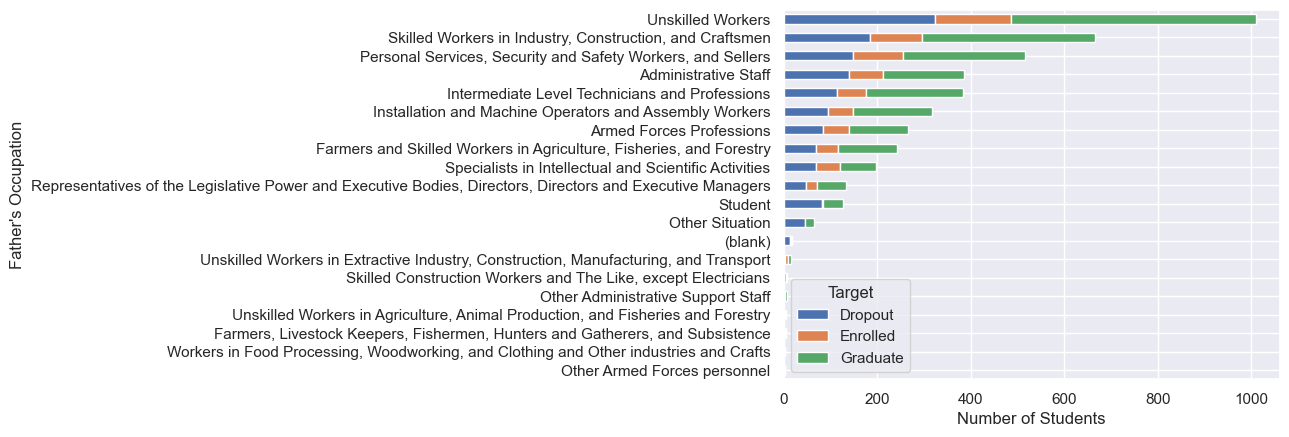

In [76]:
# Father's occupation
student_foccupation = df.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Father's occupation", values=0)

student_foccupation = student_foccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_foccupation_total = student_foccupation.sum(axis=1)
student_foccupation_sorted = student_foccupation_total.sort_values(ascending=True)
student_foccupation_top20 = student_foccupation_sorted[26:]
student_foccupation.loc[student_foccupation_top20.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Father's Occupation")
plt.show()

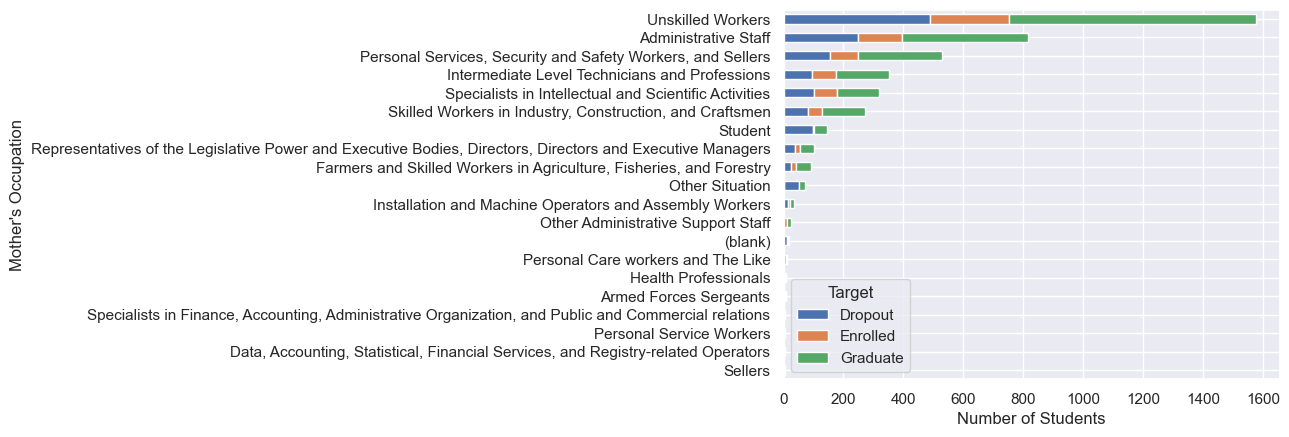

In [77]:
# Mother's occupation
student_moccupation = df.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)

student_moccupation = student_moccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_moccupation_total = student_moccupation.sum(axis=1)
student_moccupation_sorted = student_moccupation_total.sort_values(ascending=True)
student_moccupation_top20 = student_moccupation_sorted[12:]
student_moccupation.loc[student_moccupation_top20.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Mother's Occupation")
plt.show()

From the above charts, we can see that the ratio's between dropout/graduate for each of the parents' occupation are relatively constant.

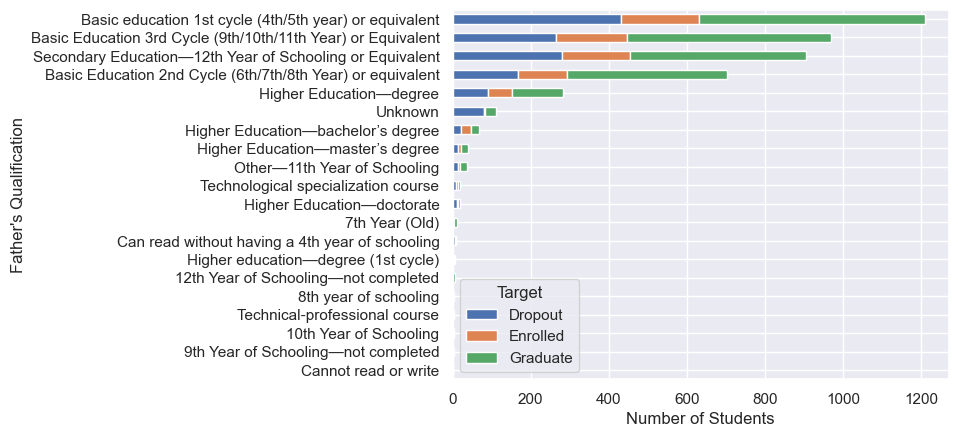

In [78]:
# Father's qualifications
student_fqualification = df.groupby(["Father's qualification", 'Target']).size().reset_index().pivot(columns='Target', index="Father's qualification", values=0)

student_fqualification = student_fqualification.rename(index={1:'Secondary Education—12th Year of Schooling or Equivalent',2:'Higher Education—bachelor’s degree',3:'Higher Education—degree',4:'Higher Education—master’s degree',5:'Higher Education—doctorate',6:'Frequency of Higher Education',7:'12th Year of Schooling—not completed',8:'11th Year of Schooling—not completed',9:'7th Year (Old)',10:'Other—11th Year of Schooling',11:'2nd year complementary high school course',12:'10th Year of Schooling',13:'General commerce course',14:'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',15:'Complementary High School Course',16:'Technical-professional course',17:'Complementary High School Course—not concluded',18:'7th year of schooling',19:'2nd cycle of the general high school course',20:'9th Year of Schooling—not completed',21:'8th year of schooling',22:'General Course of Administration and Commerce',23:',Supplementary Accounting and Administration',24:'Unknown',25:'Cannot read or write',26:'Can read without having a 4th year of schooling',27:'Basic education 1st cycle (4th/5th year) or equivalent',28:'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',29:'Technological specialization course',30:'Higher education—degree (1st cycle)',31:'Specialized higher studies course',32:'Professional higher technical course',33:'Higher Education—master’s degree (2nd cycle)',34:'Higher Education—doctorate (3rd cycle)'})

student_fqualification_total = student_fqualification.sum(axis=1)
student_fqualification_sorted = student_fqualification_total.sort_values(ascending=True)
student_fqualification_top20 = student_fqualification_sorted[14:]
student_fqualification.loc[student_fqualification_top20.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Father's Qualification")
plt.show()

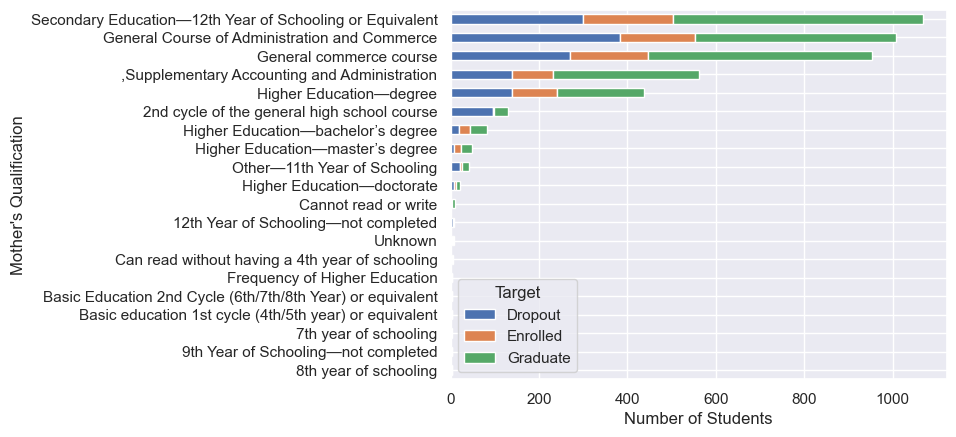

In [79]:
# Mother's qualifications
student_mqualification = df.groupby(["Mother's qualification", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's qualification", values=0)

student_mqualification = student_mqualification.rename(index={1:'Secondary Education—12th Year of Schooling or Equivalent',2:'Higher Education—bachelor’s degree',3:'Higher Education—degree',4:'Higher Education—master’s degree',5:'Higher Education—doctorate',6:'Frequency of Higher Education',7:'12th Year of Schooling—not completed',8:'11th Year of Schooling—not completed',9:'7th Year (Old)',10:'Other—11th Year of Schooling',11:'2nd year complementary high school course',12:'10th Year of Schooling',13:'General commerce course',14:'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',15:'Complementary High School Course',16:'Technical-professional course',17:'Complementary High School Course—not concluded',18:'7th year of schooling',19:'2nd cycle of the general high school course',20:'9th Year of Schooling—not completed',21:'8th year of schooling',22:'General Course of Administration and Commerce',23:',Supplementary Accounting and Administration',24:'Unknown',25:'Cannot read or write',26:'Can read without having a 4th year of schooling',27:'Basic education 1st cycle (4th/5th year) or equivalent',28:'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',29:'Technological specialization course',30:'Higher education—degree (1st cycle)',31:'Specialized higher studies course',32:'Professional higher technical course',33:'Higher Education—master’s degree (2nd cycle)',34:'Higher Education—doctorate (3rd cycle)'})

student_mqualification_total = student_mqualification.sum(axis=1)
student_mqualification_sorted = student_mqualification_total.sort_values(ascending=True)
student_mqualification_top20 = student_mqualification_sorted[9:]
student_mqualification.loc[student_mqualification_top20.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Mother's Qualification")
plt.show()

We also look at the parents' qualifications, and again, the ratio's between dropout/graduate for each of the parents' occupation are relatively constant.

Another potential avenue we can look at is whether the students' tuition fee status.

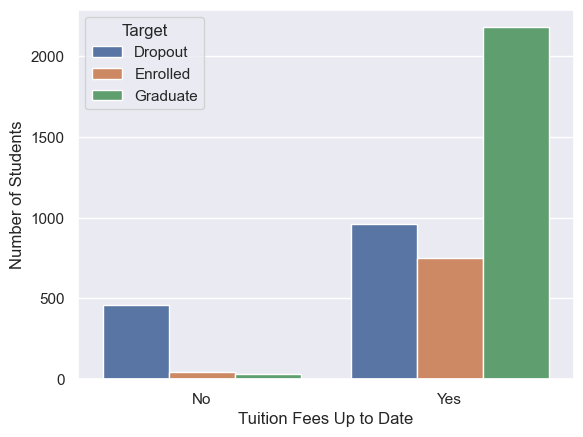

In [80]:
sb.countplot(data=df, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

As we can see, there are higher numbers of graduates compared to dropouts for students with up to date tuition fee status.

To further analyse what features affect dropout rates, we would have to generate a correlation heatmap.

To do so, we would need to first one-hot encode every categorical feature we have.

In [81]:
cats = ["Marital status", "Application mode", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Gender", "Target"]
df_cat = pd.get_dummies(df, columns=cats)
df_cat

,Application order,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Father's occupation_46,Gender_0,Gender_1,Target_Dropout,Target_Enrolled,Target_Graduate
0,5,1,0,0,1,0,20,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,0,0,1
2,5,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,1,0,0
3,2,1,0,0,1,0,20,0,0,6,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,45,0,0,6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,0,0,0,1,0,19,0,0,6,...,0,0,0,0,0,0,1,0,0,1
4420,2,1,0,1,0,0,18,1,0,6,...,0,0,0,0,0,1,0,1,0,0
4421,1,1,0,0,1,1,30,0,0,7,...,0,0,0,0,0,1,0,1,0,0
4422,1,1,0,0,1,1,20,0,0,5,...,0,0,0,0,0,1,0,0,0,1


<AxesSubplot: >

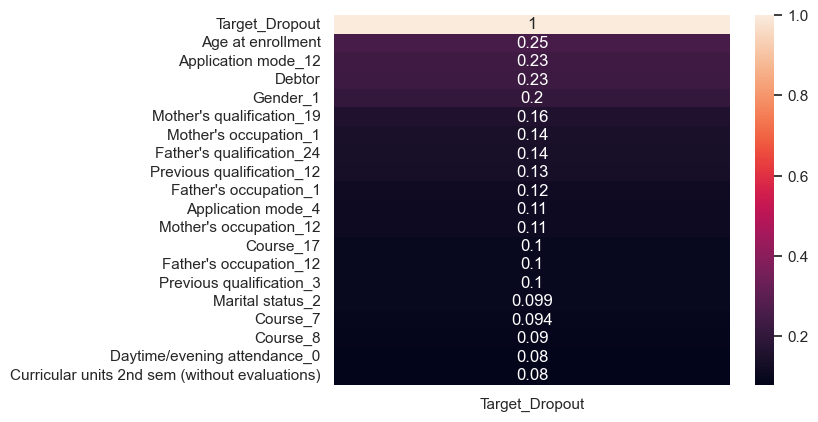

In [82]:
sb.heatmap(df_cat.corr()[['Target_Dropout']].sort_values(by='Target_Dropout', ascending=False).head(20), annot = True)

<AxesSubplot: >

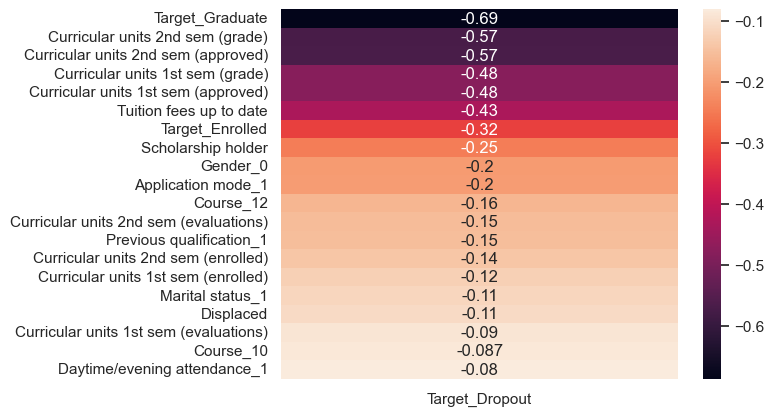

In [83]:
sb.heatmap(df_cat.corr()[['Target_Dropout']].sort_values(by='Target_Dropout', ascending=True).head(20), annot = True)

From the data we can see the academic performance (curricular units and grades) play a larger role in determining whether students dropout or not.

There is a small correlation between the age and dropout rates with the evidence being:
* Age
* Application Mode: 12 (Age above 23)

Both being above 0.20 in correlation.


We will ignore the 'Target' variables as that is the feature we are trying to find out a correlation for.

## Clustering
To reinforce that grades play the largest role in predicting dropping out, we now work backwards by clustering the grades in the dataset.

In [84]:
from sklearn.cluster import KMeans

X = pd.DataFrame(df[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)"]])

num_clust = 3

kmeans = KMeans(n_clusters = num_clust, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

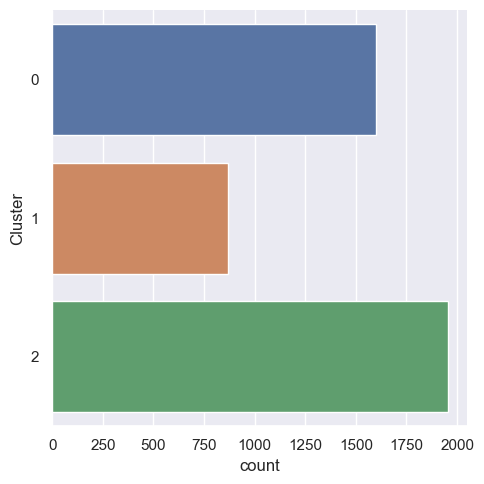

In [85]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

In [86]:
X_labeled["Target"] = df["Target"]
X_labeled

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Cluster,Target
0,0.000000,0,1,Dropout
1,13.666667,6,2,Graduate
2,0.000000,0,1,Dropout
3,12.400000,5,0,Graduate
4,13.000000,6,2,Graduate
...,...,...,...,...
4419,12.666667,5,0,Graduate
4420,11.000000,2,0,Dropout
4421,13.500000,1,0,Dropout
4422,12.000000,5,0,Graduate


In [87]:
for i in range(0, 3):
    data = X_labeled.loc[X_labeled['Cluster'] == i]
    
    for target in ["Dropout", "Enrolled", "Graduate"]:
        targetted = data.loc[data["Target"] == target]
        print(f"Cluster No. {i}: {target} (%): {(len(targetted.index) / len(data.index))}")

Cluster No. 0: Dropout (%): 0.33666458463460336
Cluster No. 0: Enrolled (%): 0.32479700187382887
Cluster No. 0: Graduate (%): 0.33853841349156777
Cluster No. 1: Dropout (%): 0.835632183908046
Cluster No. 1: Enrolled (%): 0.07816091954022988
Cluster No. 1: Graduate (%): 0.08620689655172414
Cluster No. 2: Dropout (%): 0.07936507936507936
Cluster No. 2: Enrolled (%): 0.10547875064004096
Cluster No. 2: Graduate (%): 0.8151561699948797


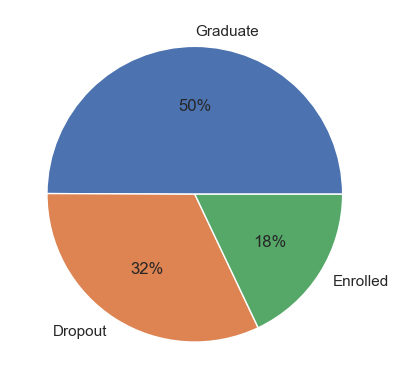

In [88]:
counts = X_labeled['Target'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%.0f%%')
plt.show()

As we can see , the clusters predicted Dropout and Graduate targets very well, however, got confused for 'Enrolled' targets.

This is expected as it is ambiguous whether 'Enrolled' students will graduate or not.

To test this, we now drop all enrolled rows and generate another KMeans model with 2 clusters.

In [89]:
df_including = df.copy()
df_excluding = df.copy()

df_excluding = df_excluding[df.Target != "Enrolled"]
df_excluding.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [90]:
X = pd.DataFrame(df_excluding[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)"]])

num_clust = 2

kmeans = KMeans(n_clusters = num_clust, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

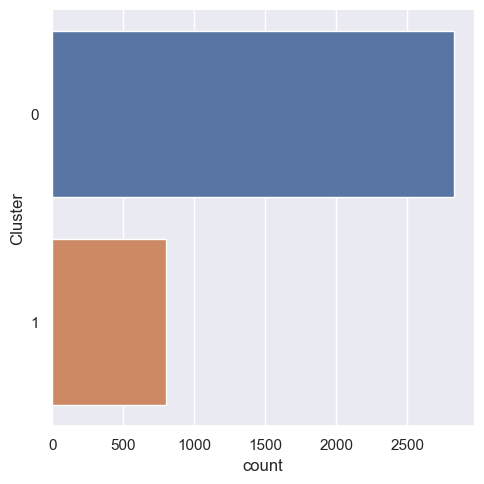

In [91]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

In [92]:
X_labeled["Target"] = df_excluding["Target"]
X_labeled

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Cluster,Target
0,0.000000,0,1,Dropout
1,13.666667,6,0,Graduate
2,0.000000,0,1,Dropout
3,12.400000,5,0,Graduate
4,13.000000,6,0,Graduate
...,...,...,...,...
4419,12.666667,5,0,Graduate
4420,11.000000,2,0,Dropout
4421,13.500000,1,0,Dropout
4422,12.000000,5,0,Graduate


In [93]:
for i in range(0, 2):
    data = X_labeled.loc[X_labeled['Cluster'] == i]
    
    for target in ["Dropout", "Graduate"]:
        targetted = data.loc[data["Target"] == target]
        print(f"Cluster No. {i}: {target} (%): {(len(targetted.index) / len(data.index))}")

Cluster No. 0: Dropout (%): 0.2454031117397454
Cluster No. 0: Graduate (%): 0.7545968882602546
Cluster No. 1: Dropout (%): 0.9064837905236908
Cluster No. 1: Graduate (%): 0.09351620947630923


As we can see, the clusters generated have a high rate of their respective targets and generate a better prediction in general.

In the model-making, we should explore potentially dropping 'Enrolled' rows in our dataset when training to provide a better prediction.